<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/fall_2025_iub/content/lessons/03_data_science_modules/03_winter_temperature_enso.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Work-along: El Nino and IN Winter Temperatures

This notebook examines the relationship between winter minimum temperatures in southern central IN and El Nino.

**Goal:** examine the relationship between El Nino and minimum winter (Dec-Jan-Feb) temperatures in Bloomington, IN

<div style="max-width:720px"><div style="position:relative;padding-bottom:56.25%"><iframe id="kaltura_player" src='https://cdnapisec.kaltura.com/p/1751071/embedPlaykitJs/uiconf_id/55382703?iframeembed=true&amp;entry_id=1_sovpwyf8&amp;config%5Bprovider%5D=%7B%22widgetId%22%3A%221_hcj1au9f%22%7D&amp;config%5Bplayback%5D=%7B%22startTime%22%3A0%7D'  allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-downloads allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" title="EAS-G 690 - Week 3 - ENSO and Tmin" style="position:absolute;top:0;left:0;width:100%;height:100%;border:0"></iframe></div></div>

```{note}
Click [here](https://iu.mediaspace.kaltura.com/media/t/1_sovpwyf8) if the above video has issues playing.
```

**Method:**

 * obtain minimum temperature data from [NOAA NClimDiv](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00005), using the *NCEI Direct Download* method
 * read the dataset using `pandas`, filter out data for southern central Indiana
 * convert the data to timeseries format
 * obtain the [ENSO longitude index](https://cascade.lbl.gov/enso-longitude-index-eli/) Excel file and read with `pandas`; convert to timeseries format
 * make the ENSO and NClimDiv timeseries align (same start and end dates, same period - DJF, etc)
 * plot both timeseries
 * plot a scatter plot
 * do linear regression and correlation analyses

For this solution notebook, I will be using data directly from NOAA instead of downloading it, since `pandas` has the ability to open data from a URL.

```{attention}
If you have difficulty accessing the NOAA data site (which happened during class), you can download the two data files referenced in the video below.
```

 * [climdiv-tmindv-v1.0.0-20250905](https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/refs/heads/fall_2025_iub/content/lessons/03_data_science_modules/climdiv-tmindv-v1.0.0-20250905)
 * [divisional-readme.txt](https://github.com/taobrienlbl/advanced_earth_science_data_analysis/raw/refs/heads/fall_2025_iub/content/lessons/03_data_science_modules/divisional-readme.txt)

## Part 1: Getting the NClimDiv data (workalong)

```{attention}
Download this notebook and place it in your course folder, running it in Visual Studio Code (not Google Colab).  You'll commit this to your git repository at the end.
```

In [10]:
""" Import libraries """
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

Downloaded C:\Users\rafaq\EASG690\climdiv-tmindv-v1.0.0-20250905 from https://www.ncei.noaa.gov/pub/data/cirs/climdiv/ on 9/12/2025 at approximately 1:15pm Eastern; also downloaded the relevant readme 'divisional-readme.txt'. 


In [ ]:
###First way###
""" Read the tmin data file. """
#set the file path
tmin_file_path = "climdiv-tmindv-v1.0.0-20250905.txt"

#read the file with pandas
#tmin_file_pd = pd.read_csv(tmin_file_path)
tmin_file_pd = pd.read_fwf(
    tmin_file_path, 
    delim_whitespace=True, 
    header=None
    )

#show the contents
tmin_file_pd.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,101281895,27.5,21.8,37.4,47.8,54.7,63.5,66.5,65.9,63.1,37.9,37.4,30.6
1,101281896,30.3,32.6,36.6,52.2,61.1,63.6,68.7,67.1,57.2,44.8,40.1,31.2
2,101281897,26.8,37.4,45.1,47.0,52.4,64.7,68.0,65.2,59.0,48.8,36.5,32.9
3,101281898,34.7,31.0,45.1,42.7,57.4,66.0,68.5,67.1,63.0,47.0,34.5,28.0
4,101281899,28.8,22.2,38.8,47.8,61.2,65.1,66.9,68.3,56.8,50.7,40.3,28.9


In [23]:
""" Filter out south central Indiana. """

# extract column 0 which has the format SSDDCCYYYY
# where SS is the state
# DD is the climate division
# CC is the variable code (fixed for this file)
# YYYY is the year
column_0 = tmin_file_pd[0].astype(str)

#find rows with state code 12 (Indiana) and division code 8 (south central) in column 0
indiana_south_central = column_0.str.contains(r"^1208")

#select those rows from the pandas object
filtered_tmin = tmin_file_pd[indiana_south_central]

#show the contents
filtered_tmin.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
10873,1208281895,14.5,11.1,28.5,42.8,50.1,61.6,61.8,62.1,56.9,33.6,31.6,25.8
10874,1208281896,22.8,23.5,26.5,47.8,56.6,59.7,64.9,62.1,52.8,37.7,34.4,27.0
10875,1208281897,17.8,25.4,33.3,40.8,45.1,58.4,65.6,60.3,53.6,45.3,32.6,25.8
10876,1208281898,26.0,23.8,36.2,38.8,53.1,61.5,64.9,63.9,58.8,45.0,28.8,20.6
10877,1208281899,20.7,12.7,29.4,43.9,55.1,62.8,63.0,64.4,53.1,46.5,36.1,21.4


C:\Users\rafaq\AppData\Local\Temp\ipykernel_20336\1157452748.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_vector = pd.date_range(start="1895-01-01", end="2025-12-31", freq="M")


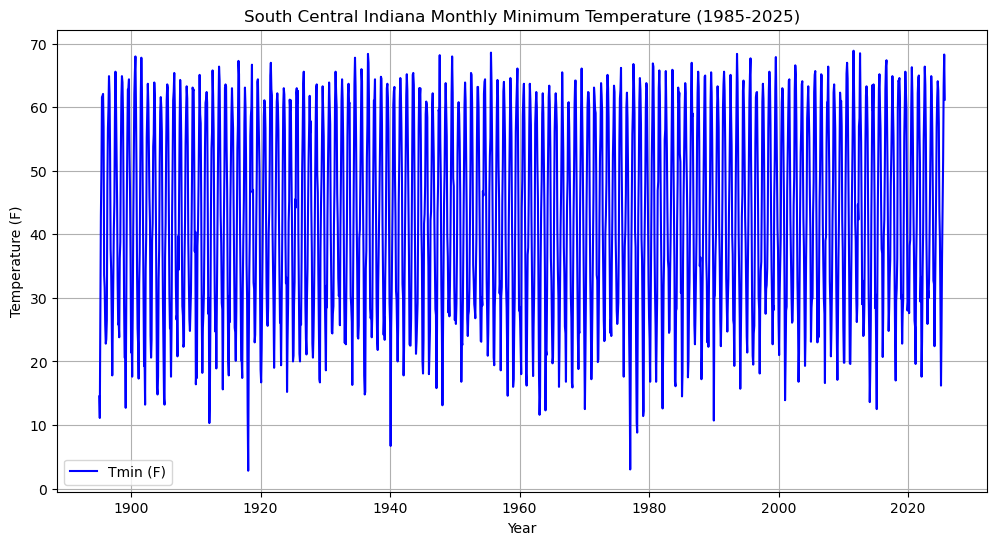

In [27]:
""" Convert the dataset to a timeseries. """
# extract the temperature values (columns 1 through 12) as a numpy.array
# (rows are year)
tmin_values = filtered_tmin.iloc[:, 1:13].to_numpy()

# ravel the temperature values to create a timeseries
tmin_timeseries = tmin_values.ravel()

# deal with missing values (these are coded as -99.90)
missing_value = 99.90
tmin_timeseries = np.where(tmin_timeseries == missing_value, np.nan, tmin_timeseries)

# create a corresponding time vector from Jan 1895 through Dec 2025
time_vector = pd.date_range(start="1895-01-01", end="2025-12-31", freq="M")

#plot the values
plt.figure(figsize=(12,6))
plt.plot(time_vector, tmin_timeseries, label="Tmin (F)", color="blue")
plt.title("South Central Indiana Monthly Minimum Temperature (1985-2025)")
plt.xlabel("Year")
plt.ylabel("Temperature (F)")
plt.grid()
plt.legend()
plt.show()



C:\Users\rafaq\AppData\Local\Temp\ipykernel_20336\2724280147.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tmin_djf = pd.Series(tmin_djf, index=time_vector_djf).resample("Y").mean()


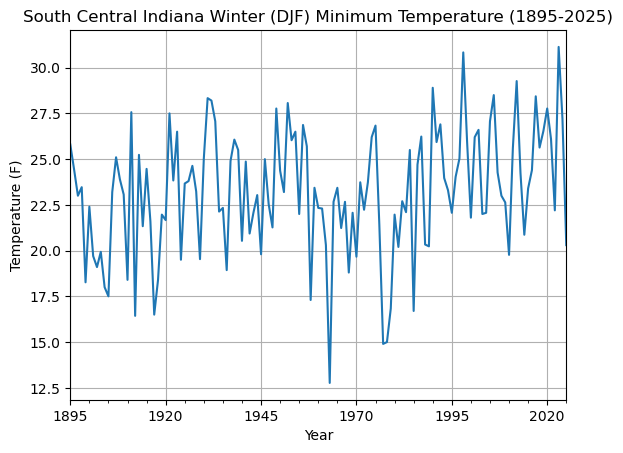

In [29]:
""" Select and average over winter times (DJF). """

# find dates that are in December, January and February
in_djf = time_vector.month.isin([12, 1, 2])

# remove the first two values
tmin_djf = tmin_timeseries[in_djf][2:]
time_vector_djf = time_vector[in_djf][2:]

# group by year (dealing with the fact that December will have a different year)
# average DJF values within year groups (dealing appropriately with NaNs)
tmin_djf = pd.Series(tmin_djf, index=time_vector_djf).resample("Y").mean()

# plot the timeseries
tmin_djf.plot()

#label axes
plt.title("South Central Indiana Winter (DJF) Minimum Temperature (1895-2025)")
plt.xlabel("Year")
plt.ylabel("Temperature (F)")
plt.grid()
plt.show()

In [47]:

# Caminho do arquivo
tmin_file_path = "climdiv-tmindv-v1.0.0-20250905.txt"

# Ler o arquivo como fixed-width
climdiv_tminv = pd.read_fwf(
    tmin_file_path,
    header=None,
    widths=[11] + [7]*12,                 # 11 caracteres para code, 7 para cada mês
    names=['code'] + list(range(1, 13)),  # nomes das colunas
    na_values=-99.9                       # trata valores faltantes
)

# Conferir primeiras linhas
print(climdiv_tminv.head())


        code     1     2     3     4     5     6     7     8     9    10  \
0  101281895  27.5  21.8  37.4  47.8  54.7  63.5  66.5  65.9  63.1  37.9   
1  101281896  30.3  32.6  36.6  52.2  61.1  63.6  68.7  67.1  57.2  44.8   
2  101281897  26.8  37.4  45.1  47.0  52.4  64.7  68.0  65.2  59.0  48.8   
3  101281898  34.7  31.0  45.1  42.7  57.4  66.0  68.5  67.1  63.0  47.0   
4  101281899  28.8  22.2  38.8  47.8  61.2  65.1  66.9  68.3  56.8  50.7   

     11    12  
0  37.4  30.6  
1  40.1  31.2  
2  36.5  32.9  
3  34.5  28.0  
4  40.3  28.9  


In [48]:
""" Isolate the south central IN region """

state_region_code = "1208"

# find rows that start with the state_region_code
scin_rows = climdiv_tminv[climdiv_tminv['code'].astype(str).str.startswith(state_region_code)]

scin_rows

,code,1,2,3,4,5,6,7,8,9,10,11,12
10873,1208281895,14.5,11.1,28.5,42.8,50.1,61.6,61.8,62.1,56.9,33.6,31.6,25.8
10874,1208281896,22.8,23.5,26.5,47.8,56.6,59.7,64.9,62.1,52.8,37.7,34.4,27.0
10875,1208281897,17.8,25.4,33.3,40.8,45.1,58.4,65.6,60.3,53.6,45.3,32.6,25.8
10876,1208281898,26.0,23.8,36.2,38.8,53.1,61.5,64.9,63.9,58.8,45.0,28.8,20.6
10877,1208281899,20.7,12.7,29.4,43.9,55.1,62.8,63.0,64.4,53.1,46.5,36.1,21.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,1208282021,25.4,19.6,35.6,41.0,49.0,62.2,64.7,65.0,57.2,51.3,29.4,33.3
11000,1208282022,17.6,23.1,34.2,40.6,54.9,60.0,66.4,63.5,55.7,39.5,33.1,25.9
11001,1208282023,31.2,30.0,33.0,41.2,50.8,56.8,64.9,61.9,55.9,45.8,32.7,32.2
11002,1208282024,22.4,30.1,36.9,46.0,56.9,61.4,64.1,62.6,57.4,43.7,39.4,29.1


In [49]:
""" Extract a vector of the data values. """
# convert the data to a numpy array
scin_data_np = scin_rows.values
print(f"scin_data_np.shape = {scin_data_np.shape}")

# remove the first column (the code column)
scin_data_np = scin_data_np[:,1:]

# ravel the data
scin_data = scin_data_np.ravel()
scin_data

scin_data_np.shape = (131, 13)


array([14.5, 11.1, 28.5, ...,  nan,  nan,  nan], shape=(1572,))

C:\Users\rafaq\AppData\Local\Temp\ipykernel_20336\330223294.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  scin_dates = pd.date_range(start='1895-01-01', end='2025-12-31', freq='M')


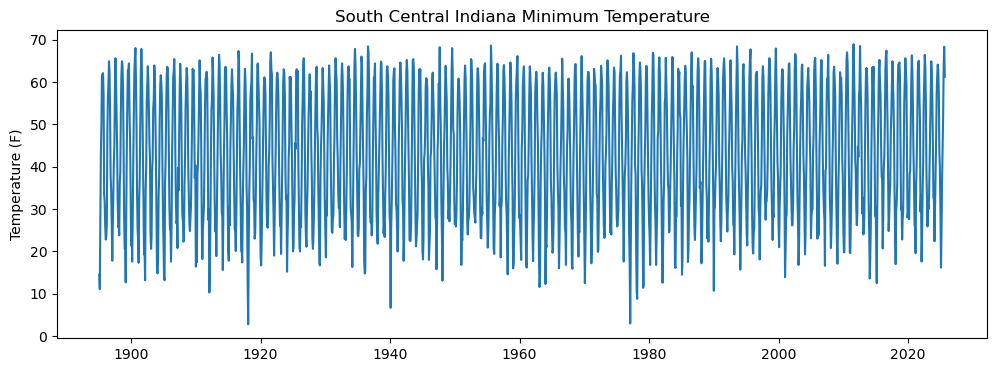

In [50]:
""" Create dates and plot the data. """
scin_dates = pd.date_range(start='1895-01-01', end='2025-12-31', freq='M')

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(scin_dates, scin_data)
ax.set_title("South Central Indiana Minimum Temperature")
ax.set_ylabel("Temperature (F)")
plt.show()

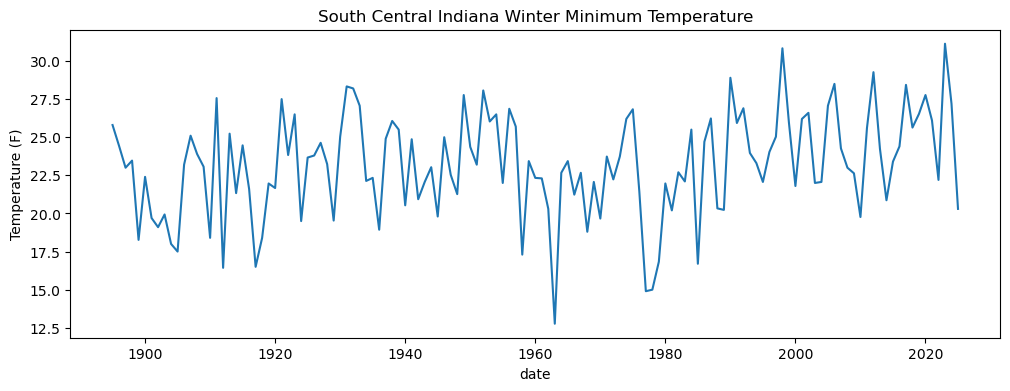

In [51]:
""" Calculate winter (DJF) averages. """

# create a new pandas dataframe with the dates and data
scin_df = pd.DataFrame({'date': scin_dates, 'South Central Indiana': scin_data})

# extract only DJF data
scin_djf_df = scin_df[scin_df['date'].dt.month.isin([12,1,2])]

# omit the first two steps of the first year and the last step of the last year since they are incomplete seasons
scin_djf_df = scin_djf_df.iloc[2:-1]

# group by year and average
scin_djf_avg = scin_djf_df.groupby(scin_djf_df['date'].dt.year).mean()

# plot the data
fig, ax = plt.subplots(figsize=(12,4))
scin_djf_avg['South Central Indiana'].plot(ax = ax)
ax.set_title("South Central Indiana Winter Minimum Temperature")
ax.set_ylabel("Temperature (F)")
plt.show()

## Part 2: Reading and opening El Nino data

```{attention}
Work in groups on your own from this point forward.
```

In [ ]:
##one way to read the dataset##
# set the URL to the ELI file
eli_url = "https://portal.nersc.gov/archive/home/projects/cascade/www/ELI/ELI_ERSSTv5_1854.01-2020.05.xlsx"

# read in the data
eli_file = "ELI_ERSSTv5_1854.01-2020.05.xlsx"

# ler a primeira planilha do Excel 
eli = pd.read_excel(eli_file, sheet_name=0)

#ver primeiras linhas
print(eli.head())


  Unnamed: 0    1854    1855    1856    1857    1858    1859    1860    1861  \
0        Jan  158.62  156.95  163.24  151.52  164.42  158.76  156.20  159.05   
1        Feb  159.30  159.96  158.84  154.36  167.38  154.50  153.08  178.75   
2        Mar  154.63  155.97  158.07  150.68  154.81  157.37  161.36  172.58   
3        Apr  154.60  154.78  150.77  147.31  162.29  154.51  152.08  151.74   
4        May  160.56  159.68  157.31  157.18  163.30  155.67  155.39  153.93   

     1862  ...    2011    2012    2013    2014    2015    2016    2017  \
0  155.27  ...  150.93  152.95  155.70  157.64  160.75  175.10  155.08   
1  156.26  ...  150.42  153.97  154.62  157.65  160.22  172.86  156.50   
2  159.08  ...  146.19  153.88  147.89  158.11  161.58  164.78  158.90   
3  151.58  ...  146.99  158.13  148.63  154.01  164.81  155.91  156.11   
4  154.05  ...  148.74  151.82  157.76  157.77  167.87  160.95  157.20   

     2018    2019    2020  
0  154.20  160.23  158.67  
1  154.15  163.96 

In [41]:
##other way to read##
""" Get the ENSO data. """
eli_url = "https://portal.nersc.gov/archive/home/projects/cascade/www/ELI/ELI_ERSSTv5_1854.01-2020.05.xlsx"

# read the data (note, I had to install the openpyxl package to read this file)
eli_df = pd.read_excel(eli_url, sheet_name='ELI_ERSSTv5_1854.01-2020.02', header=0, index_col=0, parse_dates=True)
eli_df

C:\Users\rafaq\AppData\Local\Temp\ipykernel_20336\635555324.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eli_df = pd.read_excel(eli_url, sheet_name='ELI_ERSSTv5_1854.01-2020.02', header=0, index_col=0, parse_dates=True)


,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Jan,158.62,156.95,163.24,151.52,164.42,158.76,156.20,159.05,155.27,158.75,...,150.93,152.95,155.70,157.64,160.75,175.10,155.08,154.20,160.23,158.67
Feb,159.30,159.96,158.84,154.36,167.38,154.50,153.08,178.75,156.26,178.35,...,150.42,153.97,154.62,157.65,160.22,172.86,156.50,154.15,163.96,158.26
Mar,154.63,155.97,158.07,150.68,154.81,157.37,161.36,172.58,159.08,166.54,...,146.19,153.88,147.89,158.11,161.58,164.78,158.90,151.16,161.35,155.82
Apr,154.60,154.78,150.77,147.31,162.29,154.51,152.08,151.74,151.58,154.86,...,146.99,158.13,148.63,154.01,164.81,155.91,156.11,152.29,157.37,152.13
May,160.56,159.68,157.31,157.18,163.30,155.67,155.39,153.93,154.05,153.56,...,148.74,151.82,157.76,157.77,167.87,160.95,157.20,157.35,161.7,154.51
Jun,167.42,164.79,160.78,175.59,166.08,159.56,168.50,158.09,161.82,158.75,...,160.46,163.68,163.07,168.99,179.12,162.99,166.31,163.56,169.81,NaN
Jul,171.27,169.29,164.36,170.79,168.07,172.13,174.46,162.12,163.93,175.96,...,165.15,171.93,165.38,172.30,182.31,162.86,167.77,167.36,170.99,NaN
Aug,170.06,164.72,162.23,168.05,165.31,171.72,168.99,168.20,167.53,169.20,...,163.99,170.16,165.98,170.86,182.46,160.89,165.69,167.66,169.55,NaN
Sep,167.25,170.77,157.28,171.20,163.19,166.94,160.77,167.22,172.79,165.32,...,162.47,167.07,164.86,168.46,181.57,159.52,165.12,165.77,167.04,NaN
Oct,162.51,171.23,163.08,167.59,163.84,165.18,157.49,158.13,169.94,160.51,...,158.79,164.63,161.79,164.21,179.94,156.15,161.67,165.35,164.16,NaN


C:\Users\rafaq\AppData\Local\Temp\ipykernel_20336\2445010271.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  eli_dates = pd.date_range(start='1854-01-01', end ='2021-01-01', freq='M')


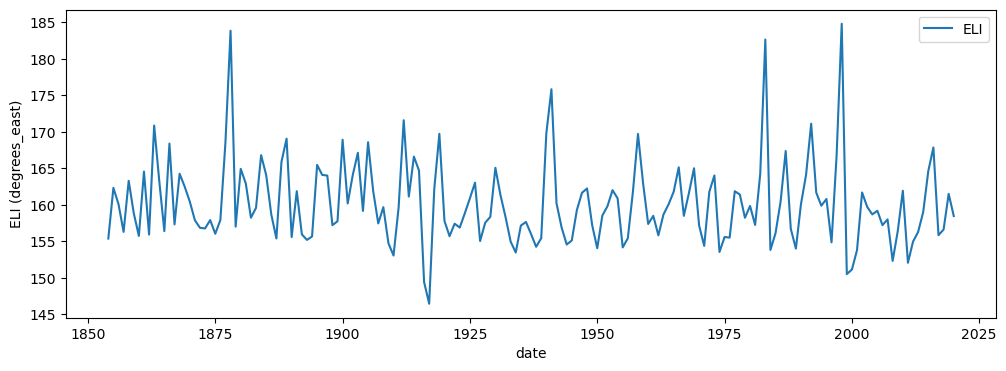

In [43]:
"""Create an ELI timeseries."""
# create a timeseries from the data
eli_data_np = eli_df.T.values.ravel()

# create dates corresponding to the data
eli_dates = pd.date_range(start='1854-01-01', end ='2021-01-01', freq='M')

# put this back into a data frame
eli_ts_df = pd.DataFrame({'date': eli_dates, 'ELI': eli_data_np})

# calculate the DJF average
eli_djf_df = eli_ts_df[eli_ts_df['date'].dt.month.isin([12,1,2])]

# omit the first two steps of the first year and the last step of the last year since they are incomplete seasons
eli_djf_df = eli_djf_df.iloc[2:-1]

# group by year and average
eli_djf_avg = eli_djf_df.groupby(eli_djf_df['date'].dt.year).mean().drop('date', axis=1)

# plot the data
fig, ax = plt.subplots(figsize=(12,4))
eli_djf_avg.plot(ax = ax)
ax.set_ylabel("ELI (degrees_east)")
plt.show()




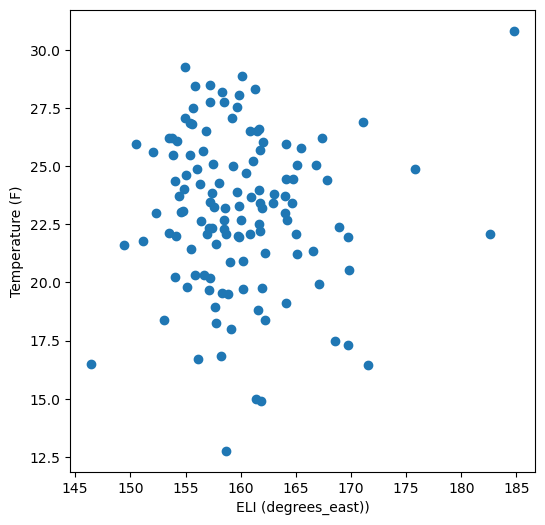

In [52]:
""" Combine the two datasets. """
# merge the two dataframes
scin_eli_df = pd.merge(scin_djf_avg, eli_djf_avg, left_index=True, right_index=True)

# plot a scatter plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(scin_eli_df['ELI'], scin_eli_df['South Central Indiana'])
ax.set_xlabel("ELI (degrees_east))")
ax.set_ylabel("Temperature (F)")
plt.show()

In [53]:
scin_eli_df['ELI']

date
1895        165.47
1896         164.1
1897        164.01
1898        157.22
1899    157.756667
           ...    
2016    167.853333
2017        155.85
2018    156.623333
2019    161.507667
2020       158.465
Name: ELI, Length: 126, dtype: object

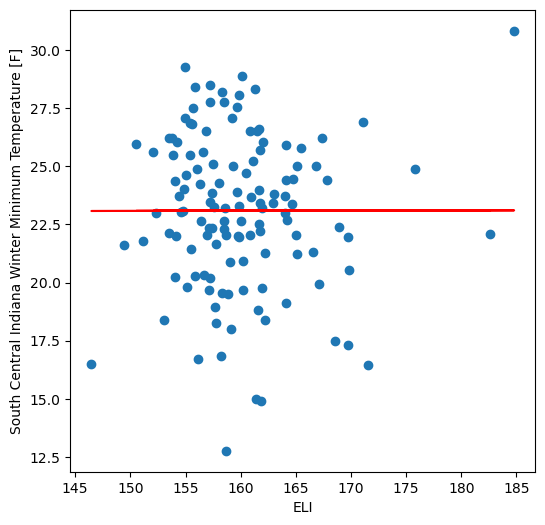

In [54]:
""" Calculate the correlation coefficient and regression line. """

# calculate the correlation coefficient
corr_matrix = scin_eli_df.corr()
corr = corr_matrix.iloc[0,1]

# calculate the regression line using scipy.stats.linregress
# note that we use the to_numpy() method to ensure we are using numpy arrays that are floats
# for some reason, the ELI data comes back as dtype 'object' and not 'float', so we convert it
result = scipy.stats.linregress(scin_eli_df['ELI'].to_numpy(dtype='float'), scin_eli_df['South Central Indiana'].to_numpy(dtype='float'))
m = result.slope
b = result.intercept

# plot the data with the regression line
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(scin_eli_df['ELI'], scin_eli_df['South Central Indiana'])
ax.plot(scin_eli_df['ELI'], m * scin_eli_df['ELI'] + b, color='red')
ax.set_xlabel("ELI")
ax.set_ylabel("South Central Indiana Winter Minimum Temperature [F]")
plt.show()

hint: use the `merge()` method in pandas to get the ELI and NOAA data to align.

In [ ]:
print('ok')

ok


git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
